Problem Definition: Predict car sales and check the accuracy of the prediction and find which features are more important.

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploring Data

In [3]:
# initializing data 
df = pd.read_csv("/kaggle/input/car-sales/Car_sales.csv")

In [4]:
#let's check first 10 values
df.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [7]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [8]:
# summarizing our data
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [9]:
# checking for the shape 
df.shape

(157, 16)

In [10]:
# checking for the duplicate values and removing them
df.drop_duplicates(keep="first")
df.shape

(157, 16)

We don't have any duplicate values

We can also drop unnecessary column that won't play any role in our solution. Additionally, this is not a time series problem as Launch Dates has nothing to do with price.

In [11]:
df["Vehicle_type"].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

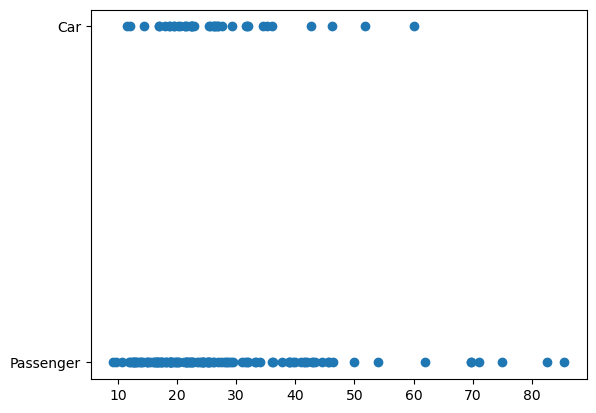

In [12]:
# let's plot to see if vehicle type has any relationship with price
plt.scatter(df["Price_in_thousands"],df["Vehicle_type"])
plt.show()

We don't see any such relation here. It just we have more passenger cars and less number of cars. It has nothing to do with prices but preferences here. So, we can drop this column. 

In [13]:
df.drop(["Vehicle_type", "Latest_Launch"], axis = 1, inplace=True)
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,S70,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,V70,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,C70,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [14]:
# let's check the shapen and size of data
len(df.columns), df.shape

(14, (157, 14))

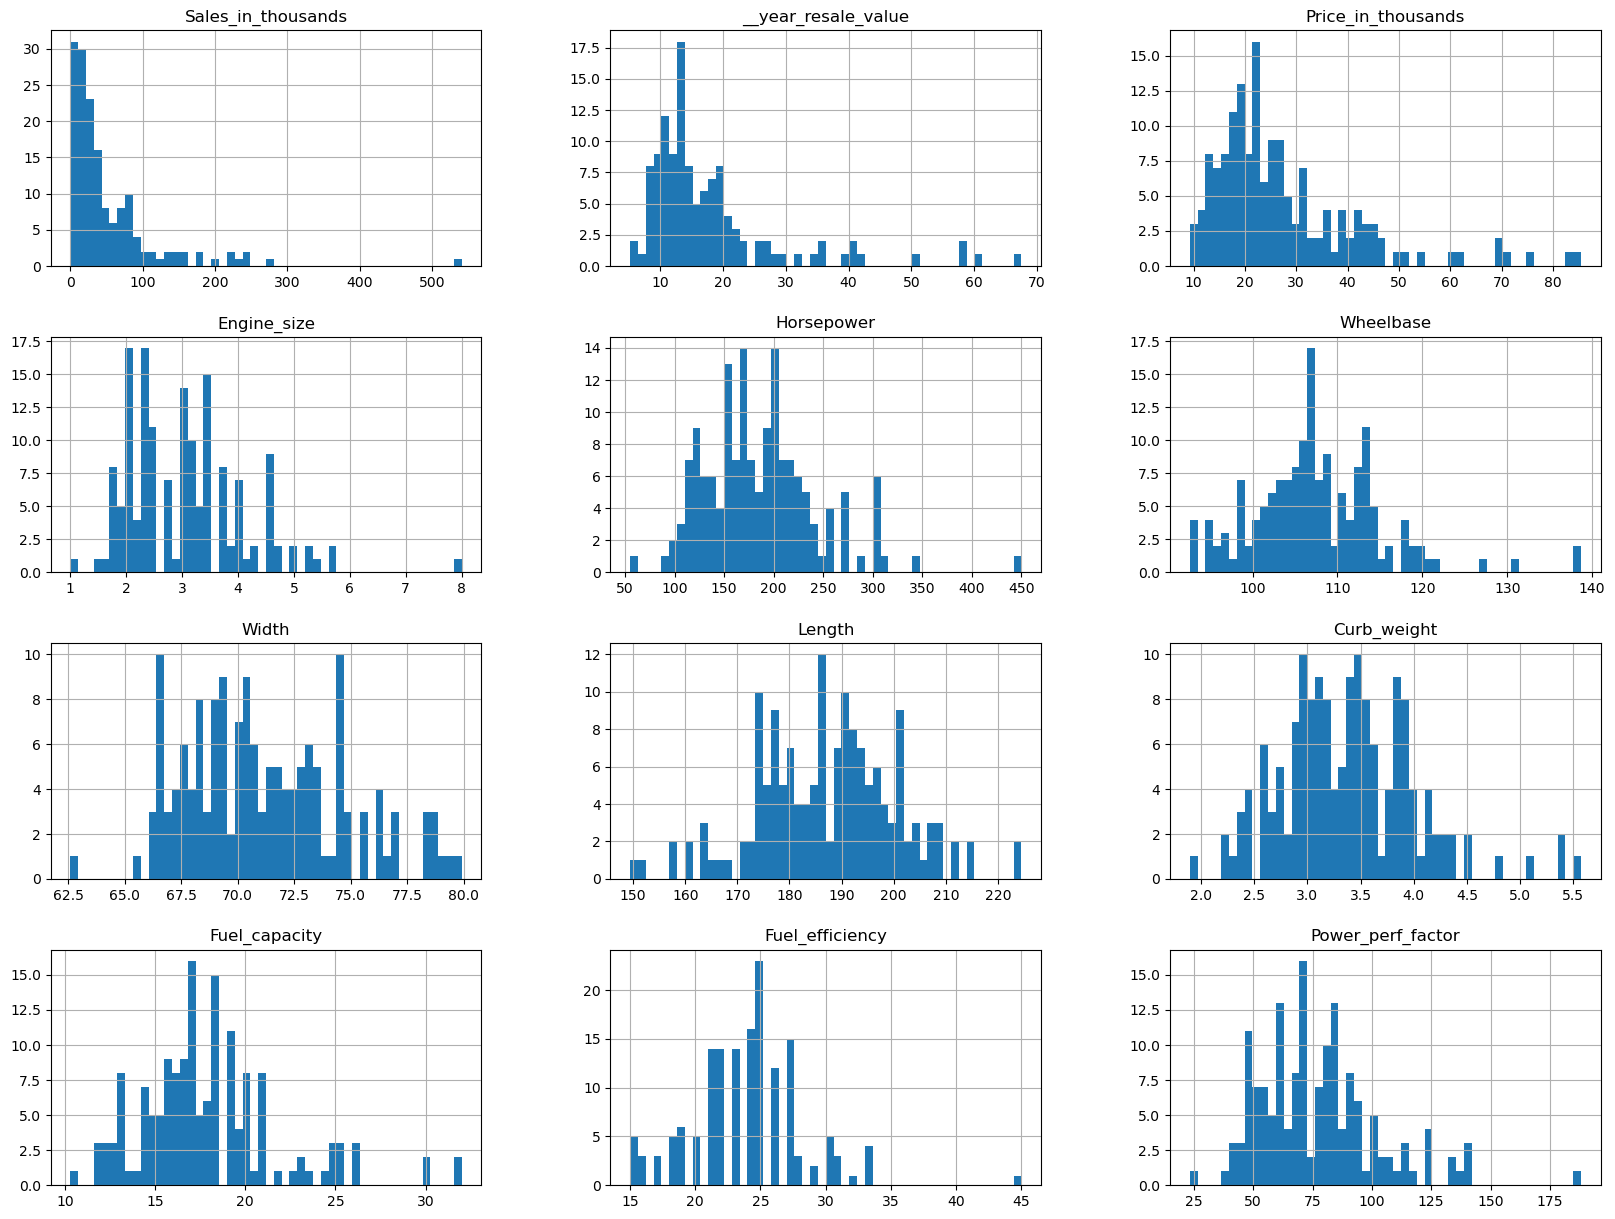

In [15]:
# let's check the data distribution of our datasets
df.hist(bins=50, figsize=(20,15))
plt.show()

As we can se most of our graphs are normally distributed other than a few graphs that have a bit skewness towards the left and a few of the graphs may have outliers. We can remove those outliers if we want but due to small dataset let's not do that and work out. 

## Creating Training And Test Sets

In [16]:
np.random.seed(42)

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
test_set.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
126,Porsche,Carrera Cabrio,1.866,67.550,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,135.914710
45,Dodge,Caravan,181.749,12.025,19.565,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,61.227000
133,Saturn,LS,49.989,NaN,15.010,2.2,137.0,106.5,69.0,190.4,2.910,13.1,28.0,54.819728
138,Toyota,Avalon,63.849,18.140,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,84.911898
111,Oldsmobile,Aurora,14.690,19.890,36.229,4.0,250.0,113.8,74.4,205.4,3.967,18.5,22.0,103.441693


In [18]:
len(test_set), len(train_set)

(32, 125)

We have 125 datapoints for training and 32 for test.

## Working With Training Set

In [19]:
# let's create a copy of training set and work on it and let's not touch test set at all

new_df = train_set.copy()

In [20]:
new_df.T

,136,55,124,84,105,42,67,127,26,135,...,87,74,121,156,20,71,106,14,92,102
Manufacturer,Toyota,Ford,Porsche,Mitsubishi,Nissan,Dodge,Jeep,Saab,Chevrolet,Subaru,...,Mercury,Lexus,Pontiac,Volvo,Chevrolet,Lexus,Nissan,Cadillac,Mercedes-B,Nissan
Model,Corolla,Ranger,Boxter,Montero,Pathfinder,Ram Van,Wrangler,5-Sep,Metro,Forester,...,Cougar,LX470,Grand Prix,S80,Malibu,GS300,Xterra,DeVille,C-Class,Altima
Sales_in_thousands,142.535,220.65,8.982,11.337,42.574,31.038,55.557,9.191,21.855,33.028,...,26.529,9.126,92.364,18.969,135.126,12.698,54.158,63.729,18.392,88.094
__year_resale_value,10.025,7.85,41.25,19.125,17.81,13.425,13.475,NaN,5.16,NaN,...,13.89,NaN,14.01,NaN,11.225,32.075,NaN,22.525,26.05,11.295
Price_in_thousands,13.108,12.05,41.43,31.807,29.299,18.575,14.46,33.12,9.235,20.095,...,16.54,60.105,21.665,36.0,16.535,37.805,22.799,39.895,31.75,20.39
Engine_size,1.8,2.5,2.7,3.5,3.3,3.9,2.5,2.3,1.0,2.5,...,2.0,4.7,3.8,2.9,3.1,3.0,3.3,4.6,2.3,2.4
Horsepower,120.0,119.0,217.0,200.0,170.0,175.0,120.0,170.0,55.0,165.0,...,125.0,230.0,195.0,201.0,170.0,225.0,170.0,275.0,185.0,155.0
Wheelbase,97.0,117.5,95.2,107.3,106.3,127.2,93.4,106.4,93.1,99.4,...,106.4,112.2,110.5,109.9,107.0,110.2,104.3,115.3,105.9,103.1
Width,66.7,69.4,70.1,69.9,71.7,78.8,66.7,70.6,62.6,68.3,...,69.6,76.4,72.7,72.1,69.4,70.9,70.4,74.5,67.7,69.1
Length,174.0,200.7,171.0,186.6,182.6,208.5,152.0,189.2,149.4,175.2,...,185.0,192.5,196.5,189.8,190.4,189.2,178.0,207.2,177.4,183.5


Let first understand what are the columns involved and how they can be important:
* Wheelbase: the distance between the front and rear axles of a vehicle. This may be!
* Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc. This may also be important.
* Year Resale Value: The price which something can achieve when sold in the future. This may vary depending on the brand value so this may also be a determining factor in car prices.
* Curb Weight: the weight of an automotive vehicle including fuel, coolant, and lubricants but excluding occupants and cargo. This may also be an important feature
* Rest other factors like fuel efficiency or fuel capacity may also be important

In [21]:
# let's check the correlation 
corr_matrix = new_df.corr(numeric_only=True)
corr_matrix["Price_in_thousands"].sort_values(ascending=False)

Price_in_thousands     1.000000
__year_resale_value    0.931248
Power_perf_factor      0.892800
Horsepower             0.838090
Engine_size            0.675106
Curb_weight            0.603102
Fuel_capacity          0.462366
Width                  0.420226
Length                 0.257026
Wheelbase              0.249175
Sales_in_thousands    -0.345753
Fuel_efficiency       -0.530948
Name: Price_in_thousands, dtype: float64

Here we can see how features are correlated with our price. It seems like year resale value is what people look for while purchasing a car but this is just based on this output. There can be other factors. Also power perf factor is also important here.

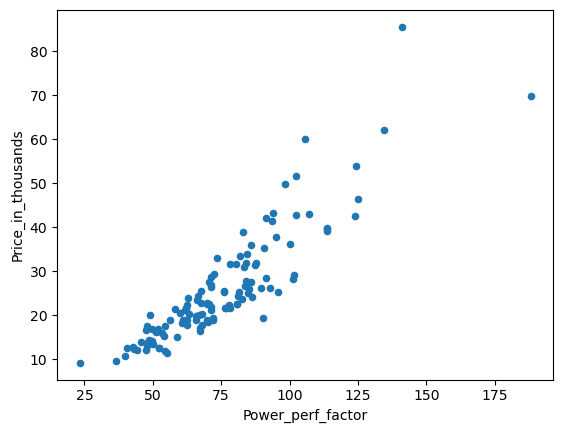

In [22]:
new_df.plot(kind="scatter", x="Power_perf_factor", y="Price_in_thousands");

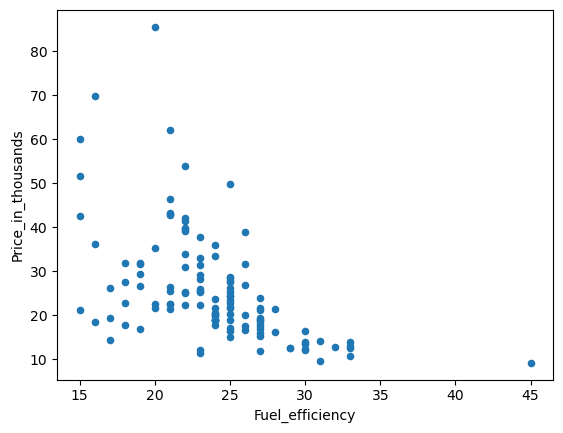

In [23]:
new_df.plot(kind="scatter", x="Fuel_efficiency", y="Price_in_thousands");

The lower the fuel efficiecy the better it is that's why the car prices are higher on the left most side. Although other factors may also be the reason behind some of the lower prices.

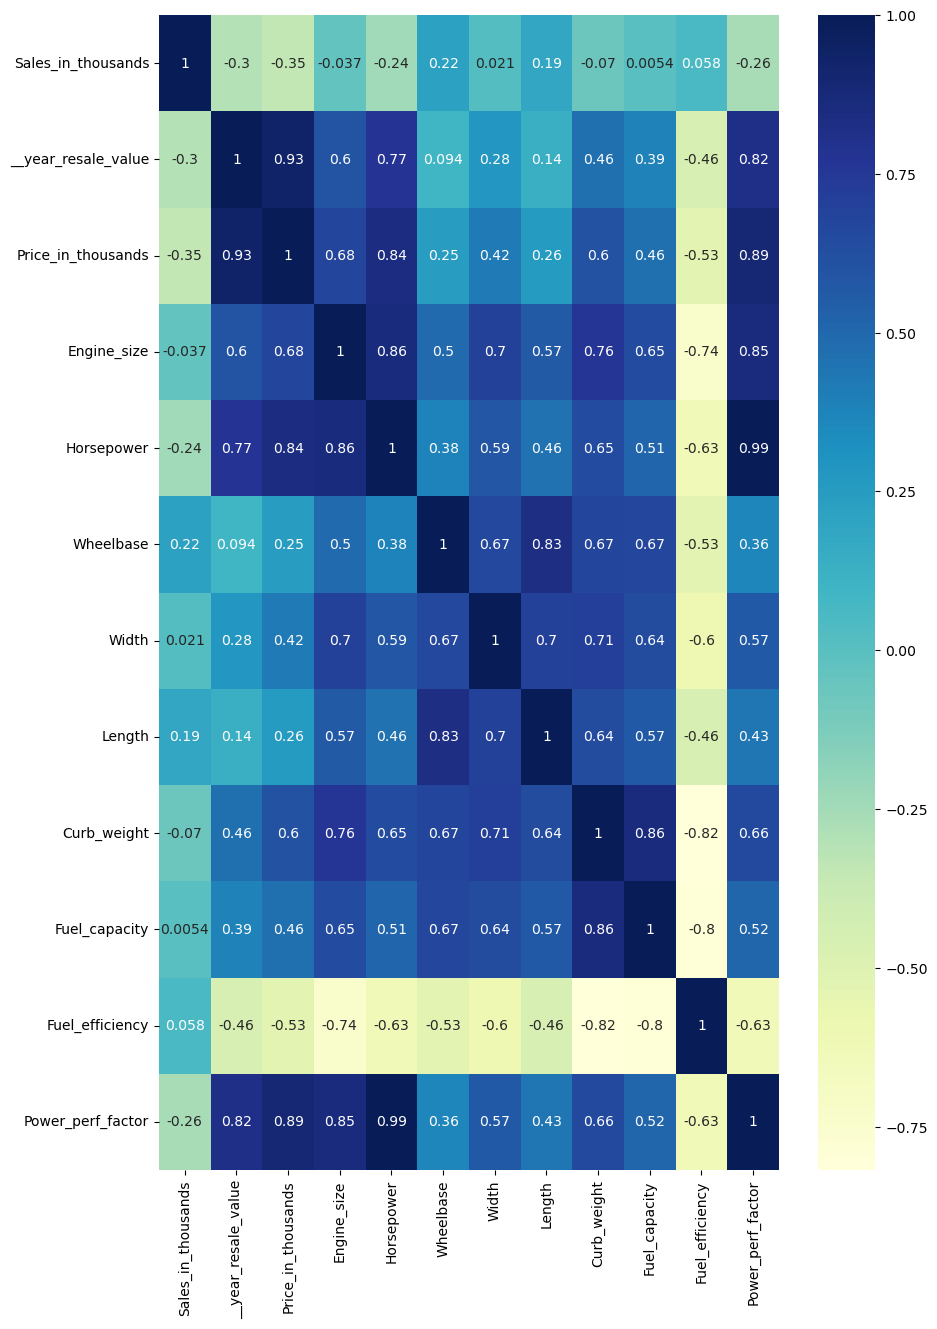

In [24]:
# let's import searborn as sns and check our correlation between feastures
import seaborn as sns 
plt.figure(figsize=(10,15))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu");

## Preparing The Data For The Model

In [25]:
# let's first check the data type 
new_df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Power_perf_factor      float64
dtype: object

In [26]:
# let's create a new copy of training data by dropping the labels 

X_train = new_df.drop("Price_in_thousands", axis=1)
X_train.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
136,Toyota,Corolla,142.535,10.025,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,47.968972
55,Ford,Ranger,220.650,7.850,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,47.389531
124,Porsche,Boxter,8.982,41.250,2.7,217.0,95.2,70.1,171.0,2.778,17.0,22.0,93.437331
84,Mitsubishi,Montero,11.337,19.125,3.5,200.0,107.3,69.9,186.6,4.520,24.3,18.0,83.920815
105,Nissan,Pathfinder,42.574,17.810,3.3,170.0,106.3,71.7,182.6,3.947,21.0,19.0,72.290355


In [27]:
new_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
136,Toyota,Corolla,142.535,10.025,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,47.968972
55,Ford,Ranger,220.650,7.850,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,47.389531
124,Porsche,Boxter,8.982,41.250,41.430,2.7,217.0,95.2,70.1,171.0,2.778,17.0,22.0,93.437331
84,Mitsubishi,Montero,11.337,19.125,31.807,3.5,200.0,107.3,69.9,186.6,4.520,24.3,18.0,83.920815
105,Nissan,Pathfinder,42.574,17.810,29.299,3.3,170.0,106.3,71.7,182.6,3.947,21.0,19.0,72.290355


In [28]:
# let's create labels 

y_train = new_df["Price_in_thousands"].copy()
y_train

136    13.108
55     12.050
124    41.430
84     31.807
105    29.299
        ...  
71     37.805
106    22.799
14     39.895
92     31.750
102    20.390
Name: Price_in_thousands, Length: 125, dtype: float64

### Data Cleaning

#### Working With Missing Values

In [29]:
# let's check for the missing values 
X_train.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    28
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             1
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

In [30]:
X_train.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Power_perf_factor      float64
dtype: object

In [31]:
# let's remove them 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# create a copy of the X_train because it can work on numerical values only 

df_num = X_train.drop(["Manufacturer", "Model"], axis = 1)

# fit the imputer 

imputer.fit(df_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([ 30.696    ,  13.79     ,   3.       , 171.5      , 107.05     ,
        70.45     , 189.       ,   3.368    ,  17.35     ,  24.       ,
        71.1559776])

In [33]:
df_num.median()

Sales_in_thousands      30.696000
__year_resale_value     13.790000
Engine_size              3.000000
Horsepower             171.500000
Wheelbase              107.050000
Width                   70.450000
Length                 189.000000
Curb_weight              3.368000
Fuel_capacity           17.350000
Fuel_efficiency         24.000000
Power_perf_factor       71.155978
dtype: float64

In [34]:
# let's apply it then 
X = imputer.transform(df_num)
X

array([[142.535     ,  10.025     ,   1.8       , ...,  13.2       ,
         33.        ,  47.96897242],
       [220.65      ,   7.85      ,   2.5       , ...,  20.        ,
         23.        ,  47.38953131],
       [  8.982     ,  41.25      ,   2.7       , ...,  17.        ,
         22.        ,  93.4373307 ],
       ...,
       [ 63.729     ,  22.525     ,   4.6       , ...,  18.5       ,
         22.        , 113.8545976 ],
       [ 18.392     ,  26.05      ,   2.3       , ...,  16.4       ,
         26.        ,  78.28073088],
       [ 88.094     ,  11.295     ,   2.4       , ...,  15.9       ,
         25.        ,  63.31372783]])

In [35]:
# put the result in dataframe 

df_tr = pd.DataFrame(X, columns = df_num.columns, index = df_num.index)
df_tr.head()

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
136,142.535,10.025,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,47.968972
55,220.650,7.850,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,47.389531
124,8.982,41.250,2.7,217.0,95.2,70.1,171.0,2.778,17.0,22.0,93.437331
84,11.337,19.125,3.5,200.0,107.3,69.9,186.6,4.520,24.3,18.0,83.920815
105,42.574,17.810,3.3,170.0,106.3,71.7,182.6,3.947,21.0,19.0,72.290355


#### Working With Categorical Data

In [36]:
# we will use one-hot encoding to convert our categorical date to numbers

df_cat = X_train[["Manufacturer", "Model"]]
df_cat

,Manufacturer,Model
136,Toyota,Corolla
55,Ford,Ranger
124,Porsche,Boxter
84,Mitsubishi,Montero
105,Nissan,Pathfinder
...,...,...
71,Lexus,GS300
106,Nissan,Xterra
14,Cadillac,DeVille
92,Mercedes-B,C-Class


In [37]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<125x153 sparse matrix of type '<class 'numpy.float64'>'
	with 250 stored elements in Compressed Sparse Row format>

In [38]:
df_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Creating Transformation Pipelines

In [39]:
# for preprocessing the numerical attributes

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   # feature scaling the data for same scales

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

df_num_tr = num_pipeline.fit_transform(df_num)

In [40]:
df_num_tr

array([[ 1.58045528, -0.75726741, -1.19420575, ..., -1.19835338,
         2.04470207, -1.13177747],
       [ 2.94486697, -1.03684466, -0.50720376, ...,  0.51286102,
        -0.19926421, -1.15635988],
       [-0.75227563,  3.25643344, -0.31091747, ..., -0.24208651,
        -0.42366083,  0.79718828],
       ...,
       [ 0.20397409,  0.84949834,  1.55380222, ...,  0.13538726,
        -0.42366083,  1.66337765],
       [-0.58791393,  1.30260628, -0.70349004, ..., -0.39307601,
         0.47392568,  0.15417932],
       [ 0.62955037, -0.59402001, -0.6053469 , ..., -0.5189006 ,
         0.24952905, -0.48078612]])

In [41]:
# dealing with numerical and categorical attributes at the same time

from sklearn.compose import ColumnTransformer

num_attributes = list(df_num)
cat_attributes = ["Manufacturer", "Model"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes),
])

X_train = full_pipeline.fit_transform(X_train)

#### Fixing the missing values in our labels

In [42]:
y_train.isna().sum()

2

In [43]:
# filling the missing values 
train_set.fillna(train_set["Price_in_thousands"].median(), inplace=True)

In [44]:
y_train = train_set["Price_in_thousands"].copy() # something I should have done earlier
y_train

136    13.108
55     12.050
124    41.430
84     31.807
105    29.299
        ...  
71     37.805
106    22.799
14     39.895
92     31.750
102    20.390
Name: Price_in_thousands, Length: 125, dtype: float64

In [45]:
y_train.isna().sum()

0

Now we have X_train and y_train. Let's train the model. Let's first check their shapes.  

In [46]:
X_train.shape, y_train.shape

((125, 164), (125,))

#### Let's keep a small data size for validation purpose

In [47]:
from sklearn.model_selection import train_test_split
X_train_modified, X_val, y_train_modified, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

In [48]:
X_train_modified.shape, y_train_modified.shape, X_val.shape, y_val.shape

((118, 164), (118,), (7, 164), (7,))

## Training Our Models

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(X_train_modified, y_train_modified)

LinearRegression()

In [50]:
# let's check the prediction on val set
lin_prediction = lin_reg.predict(X_val)
print(lin_prediction)

[10.5598097  26.55708552 30.79293386 20.77999153 32.22314216 45.86751559
 25.77923997]


In [51]:
# let's compare the output with y labels in y_val
columns = {
    "Predicted Values" : lin_prediction,
    "Original Values": y_val,
    "Difference": y_val - lin_prediction,
}

df_lin_compared = pd.DataFrame(columns)

df_lin_compared

,Predicted Values,Original Values,Difference
79,10.559810,13.987,3.427190
153,26.557086,27.500,0.942914
112,30.792934,31.598,0.805066
83,20.779992,25.450,4.670008
61,32.223142,26.000,-6.223142
100,45.867516,35.300,-10.567516
104,25.779240,26.399,0.619760


Notice the above index are coming from our main datasets. You can check the difference in our price. 

In [52]:
# let's check for the evaluation metrics 

from sklearn.metrics import mean_squared_error

# notice we are use root mean squared error so we need to take the square root of mse
lin_rmse = np.sqrt(mean_squared_error(y_val, lin_prediction))

print("Error is:", lin_rmse)


Error is: 5.153027103656421


### Decision Trees

In [53]:
# let's try another model and see if we can improve our error 

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_modified, y_train_modified)

DecisionTreeRegressor(random_state=42)

In [54]:
# let's check the model prediction 
tree_prediction = tree_reg.predict(X_val)
print(tree_prediction)

[13.108 28.8   31.93  22.799 31.01  22.605 22.527]


In [55]:
# let's compared with actual one
columns = {
    "Predicted Values" : tree_prediction,
    "Original Values" : y_val,
    "Difference" : y_val - tree_prediction
}

df_tree_compared = pd.DataFrame(columns)
df_tree_compared

,Predicted Values,Original Values,Difference
79,13.108,13.987,0.879
153,28.800,27.500,-1.300
112,31.930,31.598,-0.332
83,22.799,25.450,2.651
61,31.010,26.000,-5.010
100,22.605,35.300,12.695
104,22.527,26.399,3.872


In [56]:
# let's check for error 

tree_rmse = np.sqrt(mean_squared_error(y_val, tree_prediction))
print(tree_rmse)

5.488379607341834


As we can see the error seems to have increased

Let's try another model 

### RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_modified, y_train_modified)


RandomForestRegressor(random_state=42)

In [58]:
forest_prediction = forest_reg.predict(X_val)
print(forest_prediction)

[12.37466 23.99223 27.80518 22.14663 26.52174 28.13135 23.16176]


In [59]:
# let's compare
columns = {
    "Predicted Values" : forest_prediction,
    "Original Values" : y_val,
    "Difference" : y_val - forest_prediction
}

df_forest_compared = pd.DataFrame(columns)
df_forest_compared

,Predicted Values,Original Values,Difference
79,12.37466,13.987,1.61234
153,23.99223,27.500,3.50777
112,27.80518,31.598,3.79282
83,22.14663,25.450,3.30337
61,26.52174,26.000,-0.52174
100,28.13135,35.300,7.16865
104,23.16176,26.399,3.23724


In [60]:
# let's check for error 
forest_rmse = np.sqrt(mean_squared_error(y_val, forest_prediction))
print(forest_rmse)

3.823672614226504


### Support Vector Regressor


In [62]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_modified, y_train_modified)


SVR(kernel='linear')

In [63]:
svm_prediction = svm_reg.predict(X_val)
svm_prediction

array([11.65491272, 24.85486031, 28.01501547, 22.96432271, 30.66947891,
       34.76897898, 24.03678817])

In [64]:
svm_rmse = np.sqrt(mean_squared_error(y_val, svm_prediction))
svm_rmse

2.9060976813184483

This seem to be perfoming better

In [65]:
# let's compare
columns = {
    "Predicted Values" : svm_prediction,
    "Original Values" : y_val,
    "Difference" : y_val - svm_prediction
}

df_svm_compared = pd.DataFrame(columns)
df_svm_compared

,Predicted Values,Original Values,Difference
79,11.654913,13.987,2.332087
153,24.854860,27.500,2.645140
112,28.015015,31.598,3.582985
83,22.964323,25.450,2.485677
61,30.669479,26.000,-4.669479
100,34.768979,35.300,0.531021
104,24.036788,26.399,2.362212


Well, the error has gone down. Let's see what we can do with cross validation techniques. 

In [67]:
# A fucntion to show scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Devidation:", scores.std())

#### Cross Validation: Linear Regression

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [4.47868724 4.50112258 4.60031063 3.81874233 8.86161182]
Mean: 5.252094919859788
Standard Devidation: 1.8259273554602318


#### Cross Validation: Decision Trees

In [70]:
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [ 4.85070211  7.0511423   7.07547966  7.30532732 10.12812738]
Mean: 7.282155753872056
Standard Devidation: 1.6797702510605832


#### Cross Validation: Random Forest Regressor

In [72]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [3.97737775 5.29996465 4.61493472 3.85036648 8.5622612 ]
Mean: 5.260980960349737
Standard Devidation: 1.7294402027240972


#### Cross Validation: SVR

In [73]:
scores = cross_val_score(svm_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-scores)

display_scores(svm_rmse_scores)

Scores: [3.15610534 3.62537883 4.63262131 3.41457572 9.80260393]
Mean: 4.9262570281608395
Standard Devidation: 2.489011149882269


Well, it seems like SVR is still perfoming better than others. We can try more models here. Maybe we can add more data and check for improvement. Let's hypertune the parameters

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [75]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

5.335441140664488

In [76]:
grid_search.best_params_

{'C': 10.0, 'kernel': 'linear'}

Well let's try Randomized Search CV

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
 

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a43bd1604c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a43bcde0df0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error')

In [78]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

5.5783093645202975

In [79]:
rnd_search.best_params_

{'C': 629.782329591372, 'gamma': 3.010121430917521, 'kernel': 'linear'}

Well, it seems like Grid Search CV is slightly better so let's go with that now. Additionally, our model's perfomance has reduced as compared what we were getting normally that means we can further improve our model by adding more data or try other models and see what we can get. Also, for this project we will go with the grid search cv value but do note that error in range of 5.57 which can be a significant difference from actual value. 

### Evaluating Our System On Test Set

In [82]:
test_set.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
126,Porsche,Carrera Cabrio,1.866,67.550,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,135.914710
45,Dodge,Caravan,181.749,12.025,19.565,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,61.227000
133,Saturn,LS,49.989,NaN,15.010,2.2,137.0,106.5,69.0,190.4,2.910,13.1,28.0,54.819728
138,Toyota,Avalon,63.849,18.140,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,84.911898
111,Oldsmobile,Aurora,14.690,19.890,36.229,4.0,250.0,113.8,74.4,205.4,3.967,18.5,22.0,103.441693


In [89]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Price_in_thousands", axis=1)
y_test = test_set["Price_in_thousands"].copy()

In [90]:
X_test.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
126,Porsche,Carrera Cabrio,1.866,67.550,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,135.914710
45,Dodge,Caravan,181.749,12.025,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,61.227000
133,Saturn,LS,49.989,NaN,2.2,137.0,106.5,69.0,190.4,2.910,13.1,28.0,54.819728
138,Toyota,Avalon,63.849,18.140,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,84.911898
111,Oldsmobile,Aurora,14.690,19.890,4.0,250.0,113.8,74.4,205.4,3.967,18.5,22.0,103.441693


In [91]:
X_test.shape, y_test.shape

((32, 13), (32,))

In [99]:
X_test.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    8
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            1
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [98]:
y_test.isna().sum()

0

In [94]:
 X_test.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Power_perf_factor      float64
dtype: object

In [107]:
X_test_transformed = full_pipeline.transform(X_test)

In [108]:
X_test_transformed.shape, y_test.shape

((32, 63), (32,))

In [111]:
## final prediction 
try:
    
    final_predictions = final_model.predict(X_test_transformed)
    
except ValueError:
    
    print("X has 63 features, but SVR is expecting 164 features as input")
else: 
    print(final_predictions)

X has 63 features, but SVR is expecting 164 features as input


We are getting this error because we don't have the same dimensionality of test data as traing data which is something what SVM expects.Dimensionality should be same in both the case which we dont have so we need to collect more data for the same. 

Check this answer for the complete detail: 
https://stackoverflow.com/a/22592063/18304884

We will have to end this project or pause here and maybe work with our team to collect more data so that our dimensionality can match in test set as well, 